# Sea Ice Demo

The PCMDI Metrics sea ice driver produces metrics that compare modeled and observed sea ice extent. These metrics are the mean square errors of the total and climatological ice extent. Ice extent is defined as the area covered by sea ice concentration of >= 15%.

This demo uses three CMIP6 models. The 'siconc' and 'areacello' variables are needed and can be found in the following directories. In addition, six other models are available that can be added to the analyses in this demo:

/p/user_pub/pmp/demo/sea-ice/links_siconc  
/p/user_pub/pmp/demo/sea-ice/links_area

Add some info about observations and sectors

In [1]:
# To open and display one of the graphics
from IPython.display import display_png, JSON, Image

## Basic example

The PMP drivers can all read user arguments from parameter files. We provide a demo parameter file, which is shown below. Comments (beginning with a '#') explain each of the parameters.

In [2]:
with open("demo_param_file.py") as f:
    print(f.read())

# Sea ice metrics parameter file

# List of models to include in analysis
test_data_set = [
    "E3SM-1-0"
]

# realization can be a single realization, a list of realizations, or "*" for all realizations
realization = "r1i2p2f1"

# test_data_path is a template for the model data parent directory
test_data_path = "/p/user_pub/pmp/demo/sea-ice/links_siconc/%(model)/historical/%(realization)/siconc/"

# filename_template is a template for the model data file name
# combine it with test_data_path to get complete data path
filename_template = "siconc_SImon_%(model)_historical_%(realization)_*_*.nc"

# The name of the sea ice variable in the model data
var = "siconc"

# Start and end years for model data
msyear = 1981
meyear = 2010

# Factor for adjusting model data to decimal rather than percent units
ModUnitsAdjust = (True, "multiply", 1e-2)

# Template for the grid area file
area_template = "/p/user_pub/pmp/demo/sea-ice/links_area/%(model)/*.nc"

# Area variable name; likely 'areacello' 

To see all of the parameters available for the sea ice metrics, run the --help command as shown here:

In [3]:
%%bash
python ice_driver.py --help

usage: ice_driver.py [-h] [--parameters PARAMETERS]
                     [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                     [--case_id CASE_ID] [-v VAR [VAR ...]]
                     [--area_var AREA_VAR]
                     [-r REFERENCE_DATA_SET [REFERENCE_DATA_SET ...]]
                     [--reference_data_path REFERENCE_DATA_PATH]
                     [-t TEST_DATA_SET [TEST_DATA_SET ...]]
                     [--test_data_path TEST_DATA_PATH]
                     [--realization REALIZATION]
                     [--filename_template FILENAME_TEMPLATE]
                     [--metrics_output_path METRICS_OUTPUT_PATH]
                     [--filename_output_template FILENAME_OUTPUT_TEMPLATE]
                     [--area_template AREA_TEMPLATE]
                     [--output_json_template OUTPUT_JSON_TEMPLATE] [--debug]
                     [--plots] [--osyear OSYEAR] [--msyear MSYEAR]
                     [--oeyear OEYEAR] [--meyear MEYEAR]
                    

[WARNING] yaksa: 10 leaked handle pool objects


The PMP drivers are run on the command line. In this Jupyter Notebook, we use the bash cell magic function %%bash to run command line functions from the notebook.

The PMP sea ice metrics driver call follows the basic format:
ice_driver.py -p parameter_file.py --additional arguments

The following cell runs the driver with the demo parameter file we saw above.

In [21]:
%%bash
python ice_driver.py -p demo_param_file.py

2024-01-11 13:30:07,104 [WARNING]: bounds.py(_create_bounds:398) >> The 'y' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-01-11 13:30:17,291 [WARNING]: bounds.py(_create_bounds:398) >> The 'y' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-01-11 13:30:27,185 [WARNING]: bounds.py(_create_bounds:398) >> The 'y' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-01-11 13:30:34,909 [WARNING]: bounds.py(_create_bounds:398) >> The 'y' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-01-11 13:30:42,526 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). 

['E3SM-1-0']
Find all realizations: False
OBS: Arctic
Converting units by  multiply 0.01
Converting units by  multiply 0.01
OBS: Antarctic
Converting units by  multiply 0.01
Converting units by  multiply 0.01
['E3SM-1-0']
/p/user_pub/pmp/demo/sea-ice/links_area/E3SM-1-0/*.nc
Converting units by  multiply 1e-06

-----------------------
model, run, variable: E3SM-1-0 r1i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_188001-188912.nc
  

[WARNING] yaksa: 10 leaked handle pool objects


In [22]:
# Explain MSE

In [23]:
with open("sea_ice_demo/ex1/sea_ice_metrics.json") as f:
    print(f.read())

{
    "DIMENSIONS": {
        "index": {
            "monthly_clim": "Monthly climatology of extent",
            "total_extent": "Sum of ice coverage where concentration > 15%"
        },
        "json_structure": [
            "model",
            "obs",
            "region",
            "index",
            "statistic"
        ],
        "model": [
            "E3SM-1-0"
        ],
        "region": {},
        "statistic": {
            "mse": "Mean Square Error (10^12 km^4)"
        }
    },
    "RESULTS": {
        "E3SM-1-0": {
            "bootstrap": {
                "antarctic": {
                    "monthly_clim": {
                        "mse": "0.4063417787853511"
                    },
                    "total_extent": {
                        "mse": "0.155238367232"
                    }
                },
                "arctic": {
                    "monthly_clim": {
                        "mse": "4.356016677100606"
                    },
                    "

Some text about the output figure

In [24]:
!ls {"sea_ice_demo/ex1/MSE_bar_chart.png"}

sea_ice_demo/ex1/MSE_bar_chart.png


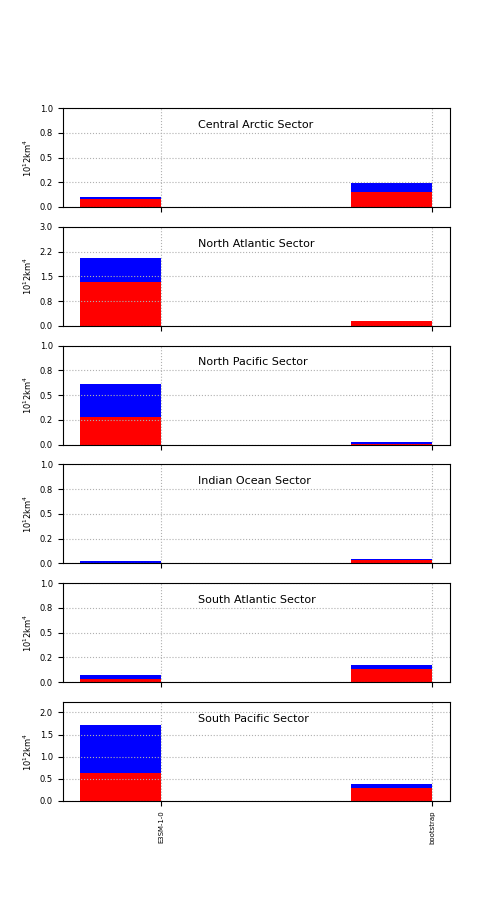

In [25]:
a = Image("sea_ice_demo/ex1/MSE_bar_chart.png")
display_png(a)

## Working with multiple realizations

The sea ice driver can generate metrics based on an average of all available realizations. To do so, provide an asterisk \* as the value to the --realization argument on the command line. Options passed on the command line will supercede arguments in the parameter file. 

In addition, we set the --case_id value to 'ex2' to save results in a new directory.

In [26]:
%%bash
python ice_driver.py -p demo_param_file.py --realization '*' --case_id "ex2"

2024-01-11 13:33:49,583 [WARNING]: bounds.py(_create_bounds:398) >> The 'y' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-01-11 13:34:00,293 [WARNING]: bounds.py(_create_bounds:398) >> The 'y' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-01-11 13:34:10,830 [WARNING]: bounds.py(_create_bounds:398) >> The 'y' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-01-11 13:34:18,848 [WARNING]: bounds.py(_create_bounds:398) >> The 'y' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-01-11 13:34:26,735 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). 

['E3SM-1-0']
Find all realizations: True
OBS: Arctic
Converting units by  multiply 0.01
Converting units by  multiply 0.01
OBS: Antarctic
Converting units by  multiply 0.01
Converting units by  multiply 0.01
['E3SM-1-0']

model, runs: E3SM-1-0 ['r1i2p2f1', 'r2i2p2f1', 'r3i2p2f1', 'r4i2p2f1']
/p/user_pub/pmp/demo/sea-ice/links_area/E3SM-1-0/*.nc
Converting units by  multiply 1e-06

-----------------------
model, run, variable: E3SM-1-0 r1i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/

INFO::2024-01-11 13:37::pcmdi_metrics:: Results saved to a json file: /home/ordonez4/git/pcmdi_metrics/pcmdi_metrics/sea_ice/sea_ice_demo/ex2/sea_ice_metrics.json
2024-01-11 13:37:10,054 [INFO]: base.py(write:251) >> Results saved to a json file: /home/ordonez4/git/pcmdi_metrics/pcmdi_metrics/sea_ice/sea_ice_demo/ex2/sea_ice_metrics.json


model, run, variable: E3SM-1-0 r4i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_188001-188912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_189001-189912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_190001-190912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0

[WARNING] yaksa: 10 leaked handle pool objects


Since we have averaged four different realizations, the resulting statistics are different than seen in example 1. 

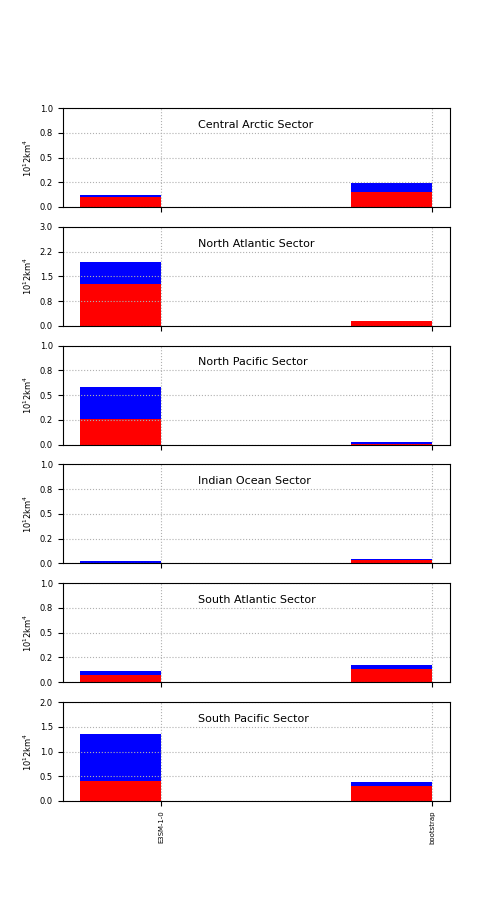

In [27]:
a = Image("sea_ice_demo/ex2/MSE_bar_chart.png")
display_png(a)

# Working with multiple models

Along with using multiple realizations, we can include multiple models in a single analysis. The model data must all follow a single filename template. All model inputs must use the same name and units for the sea ice variable.

The example below shows how to use three models in the analysis, with all available realizations. The models are listed as inputs to the --test_data_set flag.

Want to add more models? Six other model sea ice datasets are available in the directories linked in the notebook introduction.

In [28]:
%%bash
python ice_driver.py -p demo_param_file.py \
--test_data_set "E3SM-1-0" "CanESM5" "CAS-ESM2-0" \
--realization '*' \
--case_id "ex3"

2024-01-11 13:37:14,718 [WARNING]: bounds.py(_create_bounds:398) >> The 'y' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-01-11 13:37:22,367 [WARNING]: bounds.py(_create_bounds:398) >> The 'y' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-01-11 13:37:29,926 [WARNING]: bounds.py(_create_bounds:398) >> The 'y' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-01-11 13:37:35,806 [WARNING]: bounds.py(_create_bounds:398) >> The 'y' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-01-11 13:37:41,433 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). 

['E3SM-1-0', 'CanESM5', 'CAS-ESM2-0']
Find all realizations: True
OBS: Arctic
Converting units by  multiply 0.01
Converting units by  multiply 0.01
OBS: Antarctic
Converting units by  multiply 0.01
Converting units by  multiply 0.01
['CAS-ESM2-0', 'CanESM5', 'E3SM-1-0']

model, runs: CAS-ESM2-0 ['r2i1p1f1', 'r1i1p1f1', 'r4i1p1f1', 'r3i1p1f1']
/p/user_pub/pmp/demo/sea-ice/links_area/CAS-ESM2-0/*.nc
Converting units by  multiply 1e-06

-----------------------
model, run, variable: CAS-ESM2-0 r2i1p1f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/CAS-ESM2-0/historical/r2i1p1f1/siconc/siconc_SImon_CAS-ESM2-0_historical_r2i1p1f1_gn_185001-201412.nc
Converting units by  multiply 0.01

-----------------------
model, run, variable: CAS-ESM2-0 r1i1p1f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/CAS-ESM2-0/historical/r1i1p1f1/siconc/siconc_SImon_CAS-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc
Co

INFO::2024-01-11 13:41::pcmdi_metrics:: Results saved to a json file: /home/ordonez4/git/pcmdi_metrics/pcmdi_metrics/sea_ice/sea_ice_demo/ex3/sea_ice_metrics.json
2024-01-11 13:41:40,126 [INFO]: base.py(write:251) >> Results saved to a json file: /home/ordonez4/git/pcmdi_metrics/pcmdi_metrics/sea_ice/sea_ice_demo/ex3/sea_ice_metrics.json


   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_200001-200912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r2i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r2i2p2f1_gr_201001-201312.nc
Converting units by  multiply 0.01

-----------------------
model, run, variable: E3SM-1-0 r3i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_188001-188

[WARNING] yaksa: 10 leaked handle pool objects


The output JSON now includes metrics for all three models.

In [29]:
with open("sea_ice_demo/ex3/sea_ice_metrics.json") as f:
    print(f.read())

{
    "DIMENSIONS": {
        "index": {
            "monthly_clim": "Monthly climatology of extent",
            "total_extent": "Sum of ice coverage where concentration > 15%"
        },
        "json_structure": [
            "model",
            "obs",
            "region",
            "index",
            "statistic"
        ],
        "model": [
            "CAS-ESM2-0",
            "CanESM5",
            "E3SM-1-0"
        ],
        "region": {},
        "statistic": {
            "mse": "Mean Square Error (10^12 km^4)"
        }
    },
    "RESULTS": {
        "CAS-ESM2-0": {
            "bootstrap": {
                "antarctic": {
                    "monthly_clim": {
                        "mse": "7.019108133567357"
                    },
                    "total_extent": {
                        "mse": "3.871674069649"
                    }
                },
                "arctic": {
                    "monthly_clim": {
                        "mse": "4.29482818849

Now the resulting bar chart shows three different models along with the bootstrap vs. nasateam comparison.

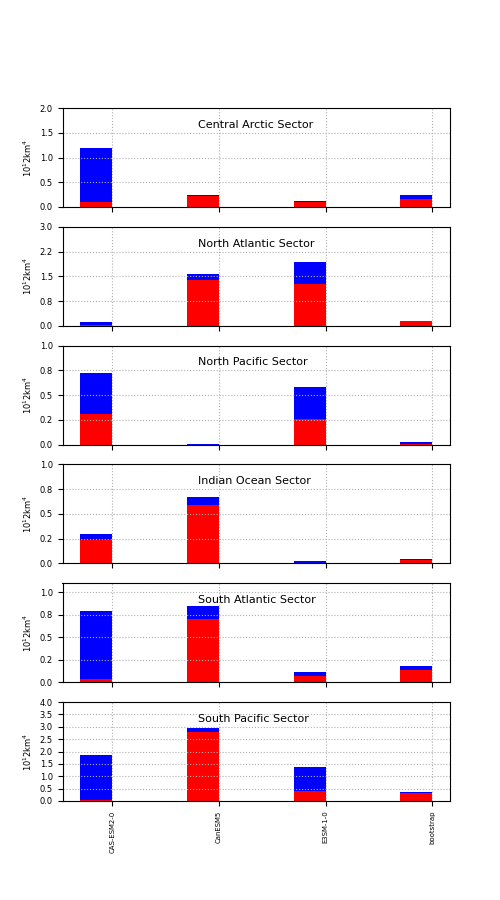

In [30]:
a = Image("sea_ice_demo/ex3/MSE_bar_chart.png")
display_png(a)

# Other examples?

Use --msyear and --meyear flags to change model year range